# Credit Card Fraud Detection using Hybrid Ensemble Modeling


**Importing Kaggle Data**

This block imports the KaggleHub library and downloads the Kaggle Credit Card Fraud dataset. It ensures the data is available locally for analysis and confirms successful import with a print statement.



In [ ]:
import kagglehub
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

print('Data source import complete.')


Data source import complete.


**Environment and Library Setup**
This section imports essential libraries for data analysis:

* numpy for numerical operations,

* pandas for data manipulation,

* os for file handling.
It also lists all files in the input directory to verify data availability.

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/creditcardfraud/creditcard.csv


**Confirming Data Download**

This block reaffirms the download of the dataset and prints the path to the dataset files for reference.



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


**Importing Core Libraries**

Here, the notebook imports:

* pandas is used for data handling
* matplotlib and seaborn for data visualization,
* sklearn modules for model building and evaluation.

In [ ]:
# First, we import all the necessary libraries.
# pandas is used for data handling, matplotlib and seaborn are for visualization,
# and sklearn is used for model building, training, and evaluation.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


**Loading the Dataset**

Loads the credit card transactions data into a pandas DataFrame for analysis.



In [ ]:
# Now, we load the dataset using pandas.
# The file is located at the given Kaggle path and contains credit card transaction data.
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


**Initial Data Exploration**

Displays the dataset's shape, previews the first few rows, and shows the distribution of normal (0) vs. fraudulent (1) transactions to highlight class imbalance.



In [ ]:
# Let's explore the dataset. We check its shape to see how many rows and columns it has.
# Then we look at the first few rows and check how many transactions are normal (0) vs fraud (1).
print(df.shape)
print(df.head())
print(df['Class'].value_counts())


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

**Visualizing Class Distribution**

Creates a bar plot to visually demonstrate the severe imbalance between fraudulent and normal transactions.



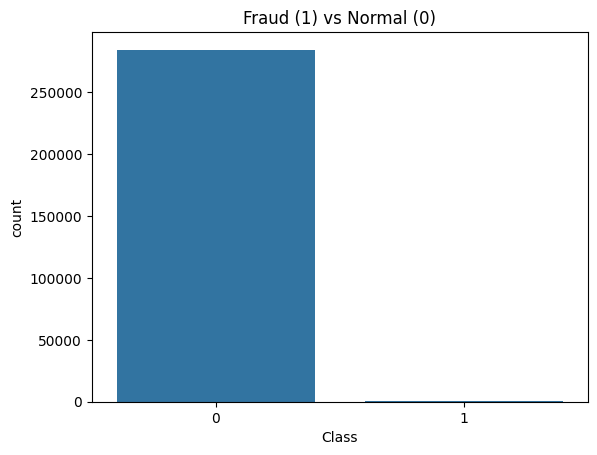

In [ ]:
# We use seaborn to create a simple bar plot of the class distribution.
# This helps us understand the class imbalance—fraud cases are very rare.
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Normal (0)")
plt.show()


**Preparing Features and Target**

Separates the input features (X) from the target variable (y), which indicates whether a transaction is fraudulent.



In [ ]:
# Now we prepare the data for machine learning.
# X contains all the input features, and y is the output (target) column we want to predict.
X = df.drop('Class', axis=1)
y = df['Class']


**Splitting Data into Train and Test Sets**

Splits the data into training and testing sets (80/20 split) to enable model evaluation on unseen data.



In [ ]:
# We split the dataset into training and testing sets using 80% for training and 20% for testing.
# This helps us evaluate the model on data it hasn’t seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Training a Random Forest Classifier**

Initializes and trains a Random Forest classifier on the training data, a robust model for classification tasks.



In [ ]:
# We create and train a Random Forest model, which is a popular and powerful classifier.
# It works well with both small and large datasets and handles imbalance decently by default.
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

**Making Predictions with Random Forest**

Generates predictions from the trained Random Forest model on the test data.



In [ ]:
# After training, we use the model to make predictions on the test set.
# These predictions will be compared with the real values to measure performance.
y_pred = rf_model.predict(X_test)


**Evaluating the Random Forest Model**

Prints the confusion matrix and classification report to assess model performance in terms of accuracy, precision, recall, and F1-score.



In [ ]:
# Finally, we print the confusion matrix and classification report.
# These show how well the model performed at detecting fraud vs normal transactions.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56862     2]
 [   22    76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



**Random Forest Probability Scores**

Obtains the predicted probabilities for the positive class (fraud) from the Random Forest model, which are useful for threshold tuning.

In [ ]:
rf_scores = rf_model.predict_proba(X_test)[:, 1]
rf_scores

array([0.96, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

**Storing Probabilities for ROC/AUC**

Stores the predicted probabilities again for use in ROC-AUC and other metric calculations.



In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # For binary classification


**Visualizing Random Forest Performance**

Reprints the classification report, plots the confusion matrix, and calculates the ROC AUC score to evaluate model discrimination ability.



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



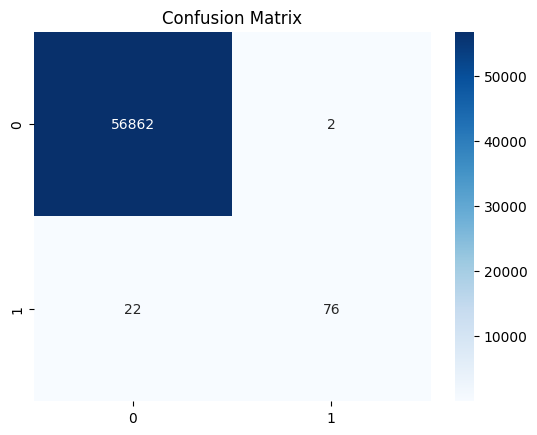

ROC AUC Score: 0.9528


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


**Training an Autoencoder (Unsupervised)**

Defines and trains an autoencoder neural network for anomaly detection, using only non-fraudulent data for training. Calculates reconstruction errors for each test sample as an anomaly score.



In [ ]:
# 2. Train Autoencoder (simple Keras example)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define autoencoder architecture
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train only on non-fraud data (label 0)
X_train_ae = X_train[y_train == 0]
autoencoder.fit(X_train_ae, X_train_ae, epochs=10, batch_size=64, verbose=0)

# Reconstruction errors for test data
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - X_test_reconstructed), axis=1)



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


**Training Isolation Forest (Unsupervised)**

Trains an Isolation Forest, an unsupervised anomaly detection algorithm, and computes anomaly scores for the test set.



In [ ]:
# 3. Train Isolation Forest
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)
isolation_scores = -isolation_forest.decision_function(X_test)  # higher = more anomalous


**Normalizing Model Scores**

Normalizes the scores from Random Forest, Autoencoder, and Isolation Forest to a 0-1 range for fair combination.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 4. Normalize all scores to [0, 1]
scaler = MinMaxScaler()
rf_scaled = scaler.fit_transform(rf_scores.reshape(-1, 1))
ae_scaled = scaler.fit_transform(reconstruction_errors.to_numpy().reshape(-1, 1))
iso_scaled = scaler.fit_transform(isolation_scores.reshape(-1, 1))

**Creating a Hybrid Score**

Combines the normalized scores from all three models using weighted averaging to create a hybrid fraud risk score.



In [ ]:
# 5. Combine scores with weights
hybrid_score = (0.6 * rf_scaled + 0.2 * ae_scaled + 0.2 * iso_scaled).flatten()

**Thresholding the Hybrid Score**

Applies a threshold to the hybrid score to classify transactions as fraudulent or not. The threshold can be tuned for optimal performance.



In [ ]:
# 6. Apply threshold
threshold = 0.5  # You can tune this
hybrid_preds = (hybrid_score >= threshold).astype(int)

**Evaluating the Hybrid Model**

Prints evaluation metrics and visualizes the confusion matrix for the hybrid model's predictions.



Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



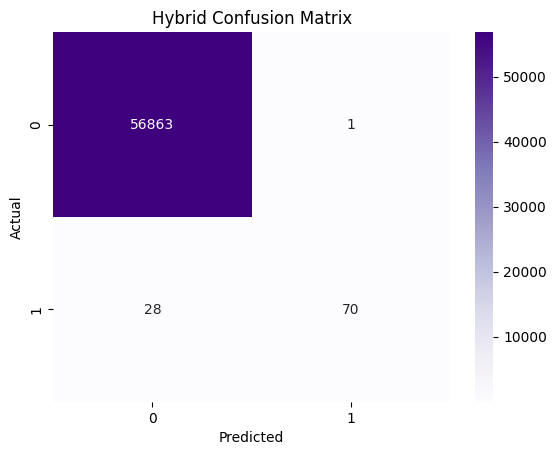

In [ ]:
# 7. Evaluation
print("Hybrid Model Classification Report:")
print(classification_report(y_test, hybrid_preds))

sns.heatmap(confusion_matrix(y_test, hybrid_preds), annot=True, fmt='d', cmap='Purples')
plt.title("Hybrid Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Precision-Recall Threshold Tuning**

Calculates precision, recall, and F1-score at various thresholds, finds the threshold that maximizes F1, and evaluates the model at this optimal threshold. Visualizes the tuned confusion matrix.



Best Threshold (based on F1): 0.3853
Precision: 0.9634, Recall: 0.8061

Tuned Hybrid Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Threshold Tuning (Precision-Recall Tradeoff)


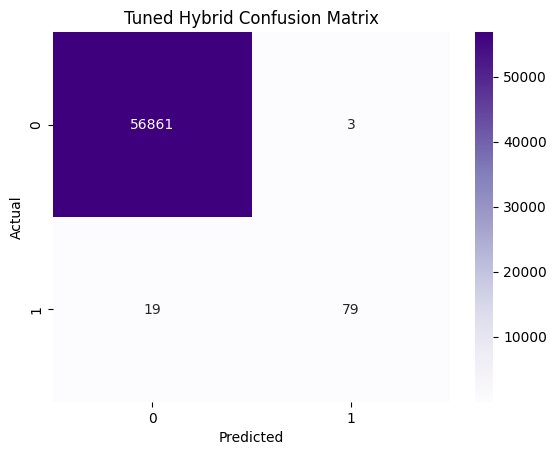

the best threshold was  0.38529241924005


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, hybrid_score)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find the threshold that maximizes recall or F1
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"Best Threshold (based on F1): {best_threshold:.4f}")
print(f"Precision: {precision[best_threshold_idx]:.4f}, Recall: {recall[best_threshold_idx]:.4f}")

# Predict using best threshold
hybrid_preds = (hybrid_score >= best_threshold).astype(int)

# Evaluate
print("\nTuned Hybrid Classification Report:")
print(classification_report(y_test, hybrid_preds))
sns.heatmap(confusion_matrix(y_test, hybrid_preds), annot=True, fmt='d', cmap='Purples')
print("Threshold Tuning (Precision-Recall Tradeoff)")
plt.title("Tuned Hybrid Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("the best threshold was ",best_threshold)

**Accuracy Calculation**
Computes the overall accuracy of the Random Forest model on the test set.



In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9995786664794073

**ROC and Precision-Recall Curves**

Plots the ROC curve and the Precision-Recall curve for the hybrid model, providing visual insight into model performance across different thresholds

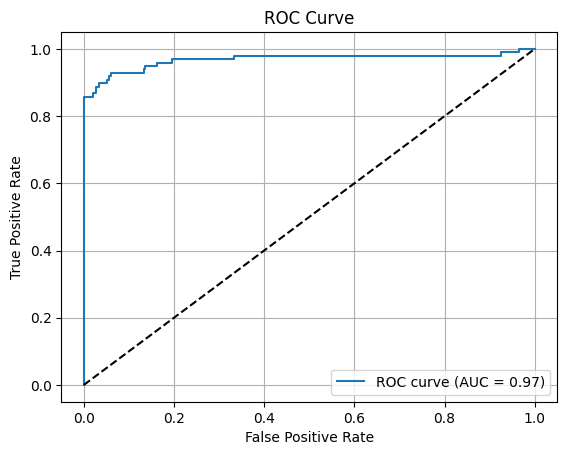

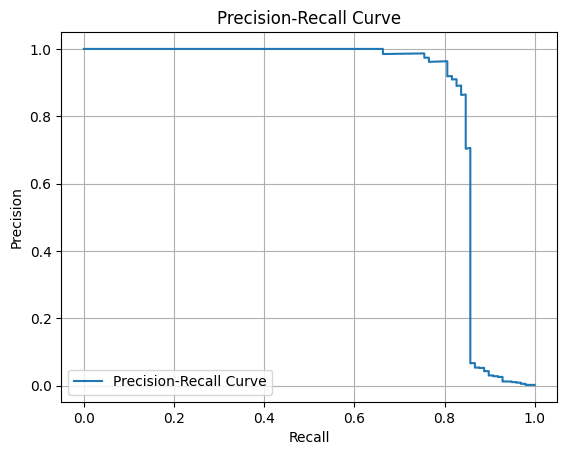

In [ ]:

# 11. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, hybrid_score)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, hybrid_score):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 12. Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, hybrid_score)
plt.figure()
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.legend()
plt.show()
